# Importing needed Lib

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('chicago_data.csv', index_col = 0)

In [3]:
df. dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
date                  object
avgTemp              float64
dtype: object

<Axes: xlabel='usertype'>

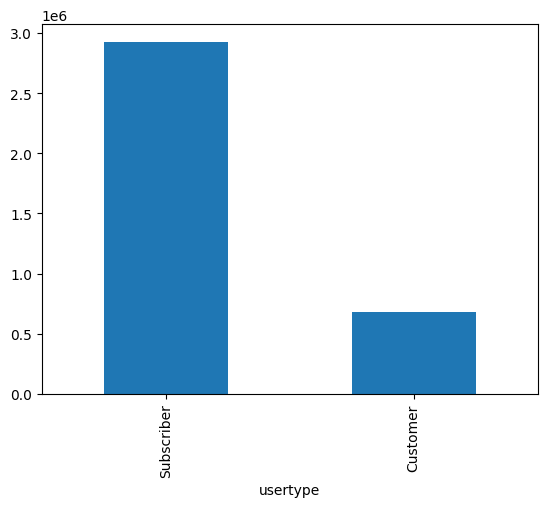

In [4]:
df['usertype'].value_counts().plot(kind = 'bar')

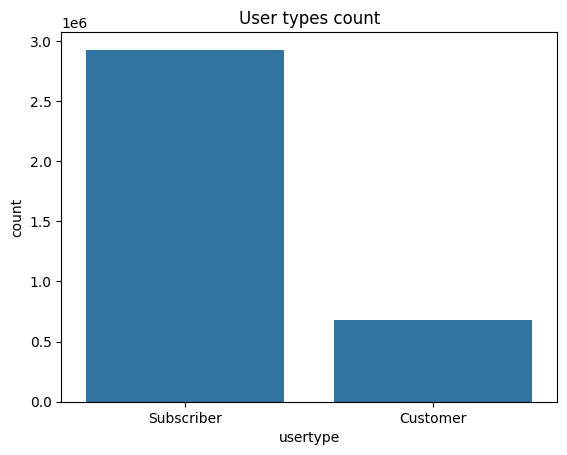

In [5]:
sns.countplot(data = df, x = 'usertype')
plt.title("User types count")
plt.show()

# Type of Plot 

In [30]:
# Set the Seaborn theme for all plots
sns.set_theme(style="whitegrid", palette="deep")

In [6]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'date',
       'avgTemp'],
      dtype='object')

In [7]:
df['birthyear'].head()

0    1988.0
1    1984.0
2    1989.0
3    1983.0
4    1989.0
Name: birthyear, dtype: float64

In [8]:
df.isnull().sum()

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               562505
birthyear            555209
date                      0
avgTemp                   0
dtype: int64

In [9]:
df['birthyear'].fillna(df['birthyear'].median(), inplace = True)

C:\Users\TOSIN\AppData\Local\Temp\ipykernel_15764\3903391934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['birthyear'].fillna(df['birthyear'].median(), inplace = True)


In [10]:
df.isnull().sum()

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               562505
birthyear                 0
date                      0
avgTemp                   0
dtype: int64

In [11]:
# Convert 'YearOfBirth' to integer to remove the .0
df['birthyear'] = df['birthyear'].astype(int)

In [12]:
df['birthyear'] 

0          1988
1          1984
2          1989
3          1983
4          1989
           ... 
3603077    1983
3603078    1990
3603079    1995
3603080    1999
3603081    1990
Name: birthyear, Length: 3603082, dtype: int32

In [13]:
# Get the current year
current_year = datetime.now().year

In [14]:
# Calculate age for each year of birth in the DataFrame
df['Age'] = current_year - df['birthyear']

In [15]:
df['Age']

0          36
1          40
2          35
3          41
4          35
           ..
3603077    41
3603078    34
3603079    29
3603080    25
3603081    34
Name: Age, Length: 3603082, dtype: int32

In [16]:
# Display the DataFrame
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,date,avgTemp,Age
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988,2018-01-01,-18.9,36
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984,2018-01-01,-18.9,40
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989,2018-01-01,-18.9,35
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983,2018-01-01,-18.9,41
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989,2018-01-01,-18.9,35


# Main Types of Charts in Seaborn

In [17]:
df['value'] = 1

In [18]:
# Group by 'StationName' and count the occurrences of each
station_counts = df.groupby('from_station_name').size().reset_index(name='Count')

In [19]:
station_counts 

,from_station_name,Count
0,2112 W Peterson Ave,456
1,63rd St Beach,956
2,900 W Harrison St,6187
3,Aberdeen St & Jackson Blvd,12056
4,Aberdeen St & Monroe St,9875
...,...,...
617,Wood St & Taylor St,5987
618,Woodlawn Ave & 55th St,3488
619,Woodlawn Ave & 75th St,30
620,Woodlawn Ave & Lake Park Ave,1010


In [20]:
# Sort by count in descending order and select the top 20
top_20_stations = station_counts.sort_values(by='Count', ascending=False).head(20)

In [21]:
top_20_stations

,from_station_name,Count
547,Streeter Dr & Grand Ave,66944
83,Canal St & Adams St,62654
146,Clinton St & Madison St,51692
150,Clinton St & Washington Blvd,48669
399,Michigan Ave & Washington St,38029
326,Lake Shore Dr & Monroe St,36174
152,Columbus Dr & Randolph St,35342
310,Kingsbury St & Kinzie St,34589
86,Canal St & Madison St,34188
169,Daley Center Plaza,33968


C:\Users\TOSIN\AppData\Local\Temp\ipykernel_15764\3411648946.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='from_station_name', data=top_20_stations, palette='viridis')


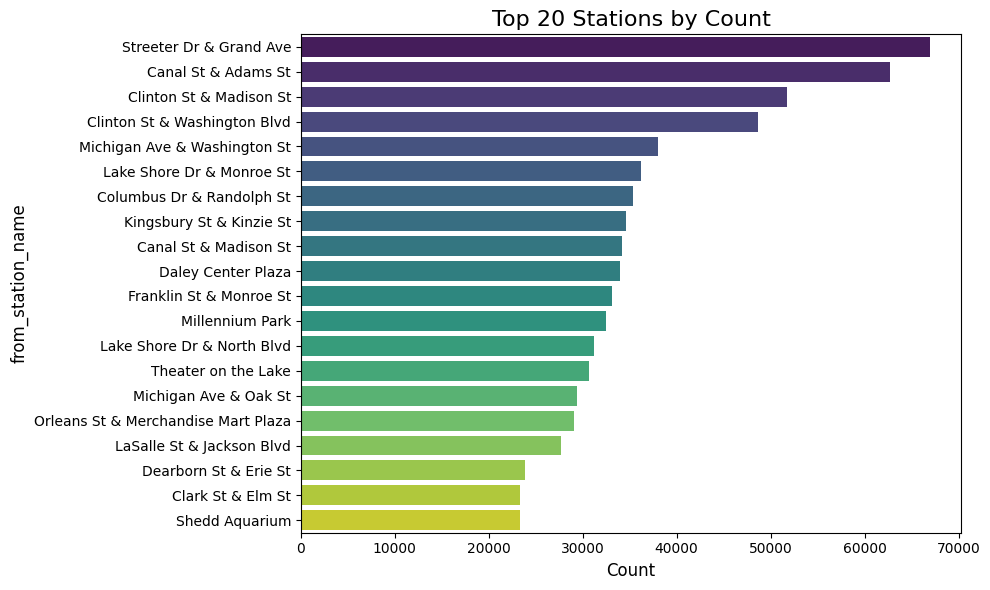

In [22]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='from_station_name', data=top_20_stations, palette='viridis')

# Set plot title and labels
plt.title('Top 20 Stations by Count', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('from_station_name', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\TOSIN\AppData\Local\Temp\ipykernel_15764\3411648946.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='from_station_name', data=top_20_stations, palette='viridis')


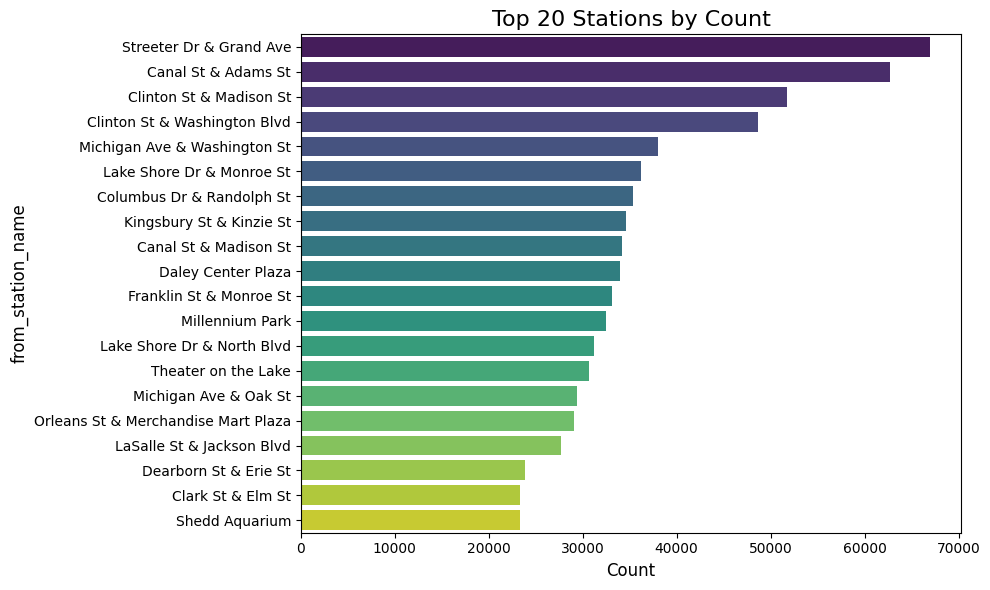

In [23]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='from_station_name', data=top_20_stations, palette='viridis')

# Set plot title and labels
plt.title('Top 20 Stations by Count', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('from_station_name', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\TOSIN\AppData\Local\Temp\ipykernel_15764\1372871544.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_20_stations, x = 'Count', y = 'from_station_name', palette=("Blues_r"))


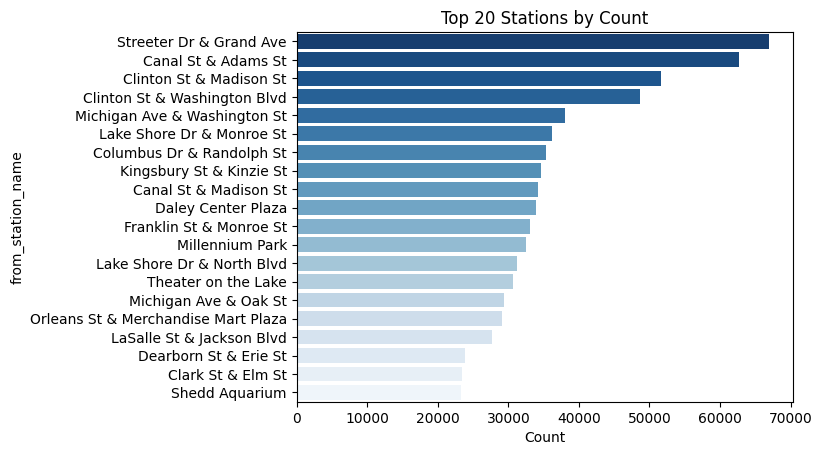

In [24]:
sns.barplot(data = top_20_stations, x = 'Count', y = 'from_station_name', palette=("Blues_r"))
plt.title("Top 20 Stations by Count")
plt.show()

C:\Users\TOSIN\AppData\Local\Temp\ipykernel_15764\49256791.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_20_stations, x = 'Count', y = 'from_station_name', palette=("Blues"))


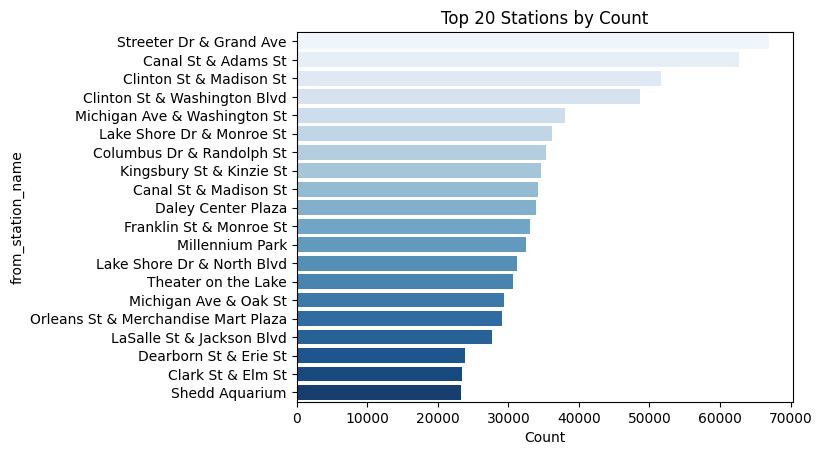

In [25]:

sns.barplot(data = top_20_stations, x = 'Count', y = 'from_station_name', palette=("Blues")) 
plt.title("Top 20 Stations by Count")
plt.show()

# Dual-axis line plot using seaborn.

In [27]:
# Convert date to format datetime
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [28]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['trip_id'].count()).reset_index()

In [29]:
df_group.head()

,date,trip_id
0,2018-01-01,376
1,2018-01-02,1637
2,2018-01-03,2493
3,2018-01-04,2416
4,2018-01-05,2228


In [30]:
df_group.rename(columns = {'trip_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = 'merge_flag')
print(df['merge_flag'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

merge_flag
both          3603082
left_only           0
right_only          0
Name: count, dtype: int64
Shape of January 1st is (376, 18)
Shape of January 2nd is (1637, 18)
Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'avgTemp', 'Age',
       'value', 'bike_rides_daily', 'merge_flag'],
      dtype='object')


In [31]:
df_temp.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'avgTemp', 'Age',
       'value', 'bike_rides_daily', 'merge_flag'],
      dtype='object')

In [32]:
df_temp.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,avgTemp,Age,value,bike_rides_daily,merge_flag
date,,,,,,,,,,,,,,,,,
2018-01-01,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988,-18.9,36,1,376,both
2018-01-01,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984,-18.9,40,1,376,both
2018-01-01,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989,-18.9,35,1,376,both
2018-01-01,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983,-18.9,41,1,376,both
2018-01-01,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989,-18.9,35,1,376,both


In [33]:
df_temp.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'avgTemp', 'Age',
       'value', 'bike_rides_daily', 'merge_flag'],
      dtype='object')

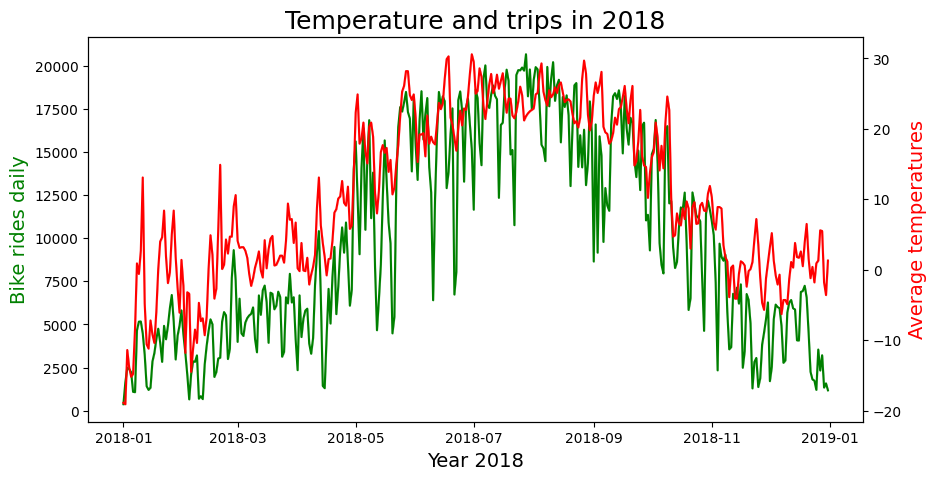

In [34]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp['bike_rides_daily'], color = "g")
ax.set_xlabel("Year 2018", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "green", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2018', fontsize = 18)
plt.show()

# Box plot 

In [35]:
df.dtypes

trip_id                       int64
start_time                   object
end_time                     object
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                     int32
date                 datetime64[ns]
avgTemp                     float64
Age                           int32
value                         int64
bike_rides_daily              int64
merge_flag                 category
dtype: object

In [36]:
df['gender']

0            Male
1            Male
2            Male
3            Male
4            Male
            ...  
3603077    Female
3603078    Female
3603079    Female
3603080      Male
3603081      Male
Name: gender, Length: 3603082, dtype: object

In [37]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'date', 'avgTemp',
       'Age', 'value', 'bike_rides_daily', 'merge_flag'],
      dtype='object')

C:\Users\TOSIN\AppData\Local\Temp\ipykernel_15764\2945804404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'gender', y = 'Age', data = df, palette = {'Male': 'royalblue', 'Female': 'pink'})


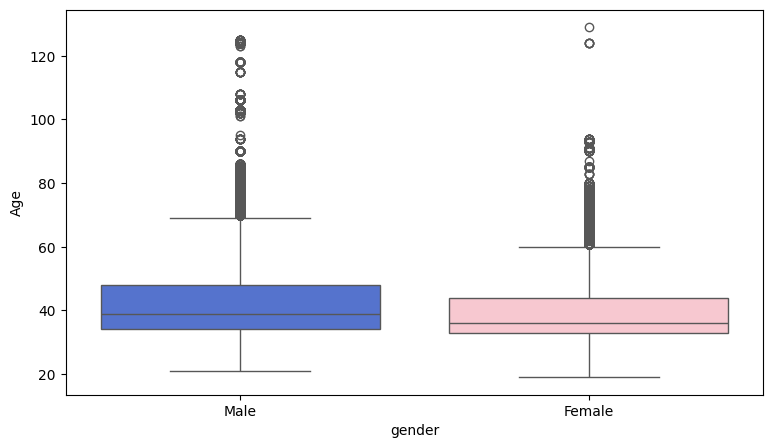

In [38]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'gender', y = 'Age', data = df, palette = {'Male': 'royalblue', 'Female': 'pink'})
plt.show()

 # Comments and Interpretations for the Box Plot

- Median: The line inside each box represents the median score for male and female.
  
- The median for male is higher that female, on average, maletroage of bike than female.
 
- Interquartile Range (IQR): The box itself spans from the 25th percentile (Q1) to the 75th percentile (Q3) of the data.

- Outliers: Individual points outside the whiskers are outliers, indicating extreme values.

- Outliers can be seen in both male and female
- Outliers female scored exceptionally high or low compared to their male.

 

# FacetGrid 

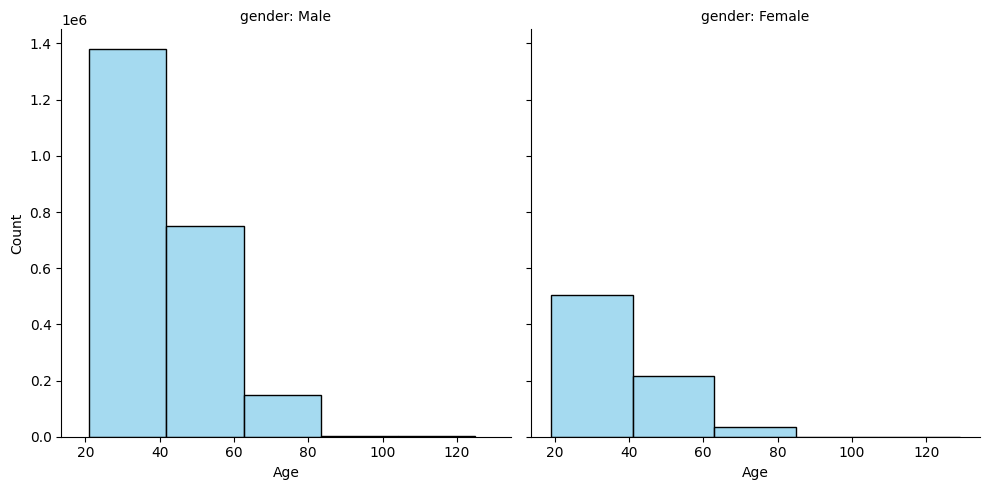

In [39]:
# Create a FacetGrid for gender
g = sns.FacetGrid(df, col="gender", height=5, aspect=1)

# Map a histogram to the FacetGrid for 'Score' by 'Gender'
g.map(sns.histplot, "Age", bins=5, kde=False, color="skyblue")

# Set axis labels and plot titles
g.set_axis_labels("Age", "Count")
g.set_titles("gender: {col_name}")

# Show the plot
plt.tight_layout()
plt.show()

 # Comments and Interpretations for the FacetGrid Plot

-Symmetry/Skewness: FacetGrid Plot for both male and female right-skewed. For example, 

-The distribution for females is right-skewed (more values concentrated on the lower end), suggesting that a significant portion of females   have lower counts, while males have higher counts.

- Comparison between Genders: If the distribution for female is more concentrated (narrow), it may indicate that female's count tend to cluster within a certain range, suggesting less variability. In contrast, a wider distribution for male indicates more variability in men's count.

- Height of Bars: The height of the bars in a histogram represents the frequency or count of individuals in a given score range. For instance, if more female fall into the lower count ranges than male
  
- Participation Discrepancies: If the count of men and women is significantly different, you could also see this visually in the number of data points present for each gender.


 